In [8]:
import matplotlib.pyplot as plt

from superfv.euler_solver import EulerSolver
import superfv.initial_conditions as ic

In [ ]:
N = 64
p = 3

llf_solver = EulerSolver(
    ic=lambda array_slicer, x, y, z: ic.square(
        array_slicer, x, y, z, vx=1, bounds=(1, 2)
    ),
    nx=N,
    p=p,
    ZS=True,
    limiting_vars=("rho",),
    PAD={"rho": (1, 2)},
    adaptive_timestepping=False,
    primitive_nodes=True,
    riemann_solver="llf",
)
llf_solver.run(1.0)

hllc_solver = EulerSolver(
    ic=lambda array_slicer, x, y, z: ic.square(
        array_slicer, x, y, z, vx=1, bounds=(1, 2)
    ),
    nx=N,
    p=p,
    ZS=True,
    limiting_vars=("rho",),
    PAD={"rho": (1, 2)},
    adaptive_timestepping=False,
    primitive_nodes=True,
    riemann_solver="hllc",
)
hllc_solver.run(1.0)

100%|██████████| 10.0/10.0 [00:11]                 
100%|██████████| 10.0/10.0 [00:12]                


In [10]:
llf_solver.step_count, hllc_solver.step_count

(2757, 2759)

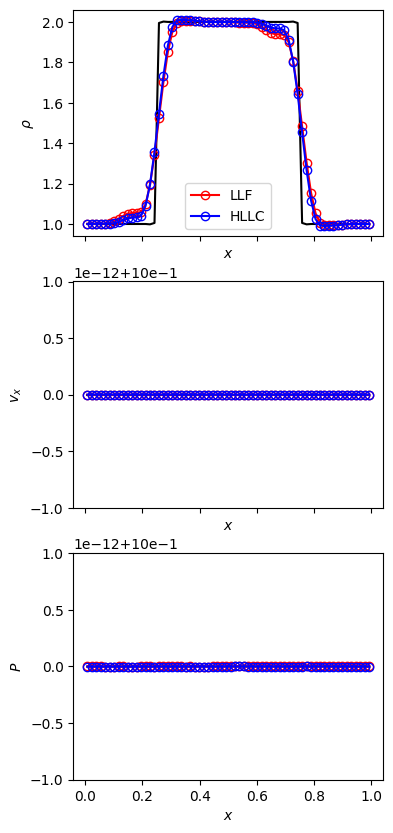

In [11]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(4, 10))
llf_solver.plot_1d_slice(axs[0], "rho", array="w", x=None, t=0, color="k")
llf_solver.plot_1d_slice(
    axs[0],
    "rho",
    array="w",
    x=None,
    t=10,
    label="LLF",
    color="r",
    marker="o",
    mfc="none",
)
hllc_solver.plot_1d_slice(
    axs[0],
    "rho",
    array="w",
    x=None,
    t=10,
    label="HLLC",
    color="b",
    marker="o",
    mfc="none",
)
axs[0].set_ylabel(r"$\rho$")
llf_solver.plot_1d_slice(axs[1], "vx", array="w", x=None, t=0, color="k")
llf_solver.plot_1d_slice(
    axs[1],
    "vx",
    array="w",
    x=None,
    t=10,
    label="LLF",
    color="r",
    marker="o",
    mfc="none",
)
hllc_solver.plot_1d_slice(
    axs[1],
    "vx",
    array="w",
    x=None,
    t=10,
    label="HLLC",
    color="b",
    marker="o",
    mfc="none",
)
axs[1].set_ylabel(r"$v_x$")
llf_solver.plot_1d_slice(axs[2], "P", array="w", x=None, t=0, color="k")
llf_solver.plot_1d_slice(
    axs[2], "P", array="w", x=None, t=10, label="LLF", color="r", marker="o", mfc="none"
)
hllc_solver.plot_1d_slice(
    axs[2],
    "P",
    array="w",
    x=None,
    t=10,
    label="HLLC",
    color="b",
    marker="o",
    mfc="none",
)
axs[2].set_ylabel(r"$P$")
axs[2].set_xlabel(r"$x$")
axs[0].legend()